In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [49]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [50]:
# This part for understanding the data 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
print("Dypes:",train_df.dtypes)
print("Columns:",train_df.columns)

Dypes: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [52]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [55]:
mean_age = train_df['Age'].mean()
print(mean_age)

29.69911764705882


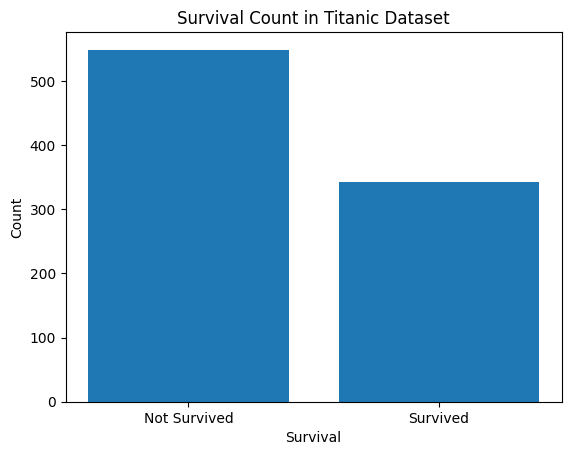

Number of who did not survive: 549
Number of survived: 342


In [56]:
survived_count = train_df['Survived'].value_counts()

# Defining Categories
categories = ['Not Survived', 'Survived']
values = [survived_count[0], survived_count[1]]

# Creating Bar plot
plt.bar(categories, values)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()
print(f"Number of who did not survive: {survived_count[0]}")
print(f"Number of survived: {survived_count[1]}")

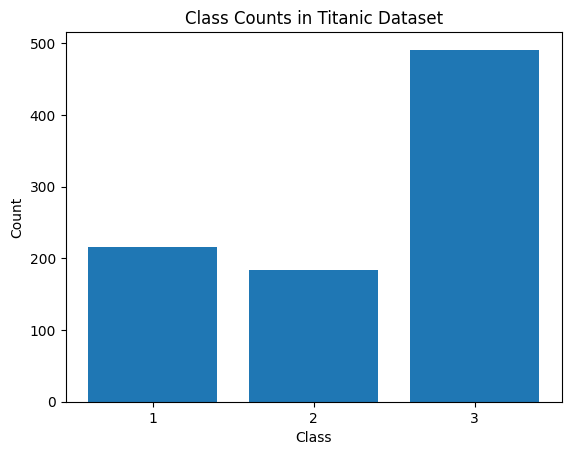

Number of first Class: 216
Number of second Class: 184
Number of third Class: 491


In [57]:
pclass_count = train_df["Pclass"].value_counts()
categories = ["1", "2", "3"]
values = [pclass_count[1], pclass_count[2], pclass_count[3]]
plt.bar(categories, values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts in Titanic Dataset')
plt.show()
print(f"Number of first Class: {values[0]}")
print(f"Number of second Class: {values[1]}")
print(f"Number of third Class: {values[2]}")

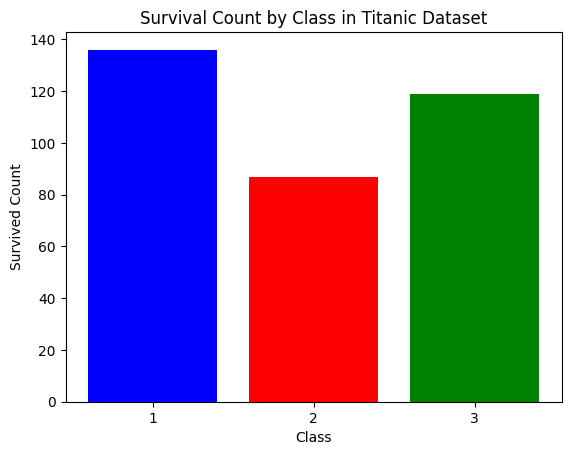

Number of Survived in first Class: 136
Number of Survived in second Class: 87
Number of Survived in third Class: 119


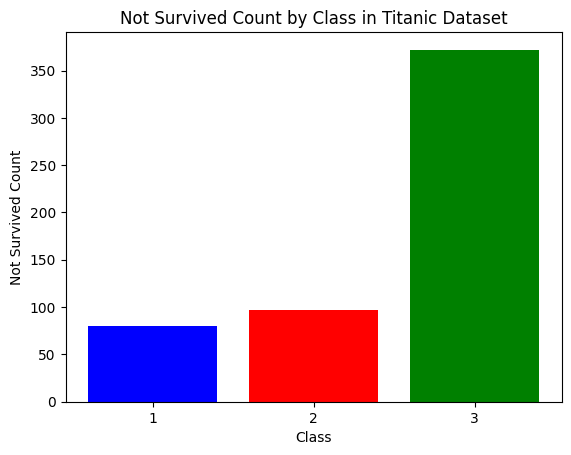

Number of Not Survived in first Class: 80
Number of Not Survived in second Class: 97
Number of Not Survived in third Class: 372


In [58]:
survived_count = train_df[train_df['Survived'] == 1]['Pclass'].value_counts()
not_survived_count = train_df[train_df['Survived'] == 0]['Pclass'].value_counts()
categories = ['1', '2', '3']

#Shows count of survivors for each passenger class, assigning a default value of 0 if there are no survivors in that class.
values = [survived_count[1], survived_count[2], survived_count[3]]
not_survived_values = [not_survived_count[1], not_survived_count[2], not_survived_count[3]]
plt.bar(categories, values, color=['blue', 'red', 'green'])
plt.xlabel('Class')
plt.ylabel('Survived Count')
plt.title('Survival Count by Class in Titanic Dataset')
plt.show()
print(f"Number of Survived in first Class: {values[0]}")
print(f"Number of Survived in second Class: {values[1]}")
print(f"Number of Survived in third Class: {values[2]}")
plt.bar(categories, not_survived_values, color=['blue', 'red', 'green'])
plt.xlabel('Class')
plt.ylabel('Not Survived Count')
plt.title('Not Survived Count by Class in Titanic Dataset')
plt.show()
print(f"Number of Not Survived in first Class: {not_survived_values[0]}")
print(f"Number of Not Survived in second Class: {not_survived_values[1]}")
print(f"Number of Not Survived in third Class: {not_survived_values[2]}")

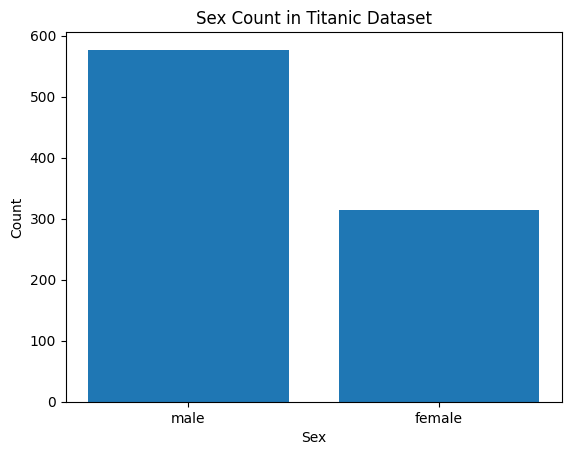

Number of Male: 577
Number of Female: 314


In [59]:
sex_count = train_df['Sex'].value_counts()
plt.bar(sex_count.index, sex_count.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count in Titanic Dataset')
plt.show()
print(f"Number of Male: {sex_count['male']}")
print(f"Number of Female: {sex_count['female']}")

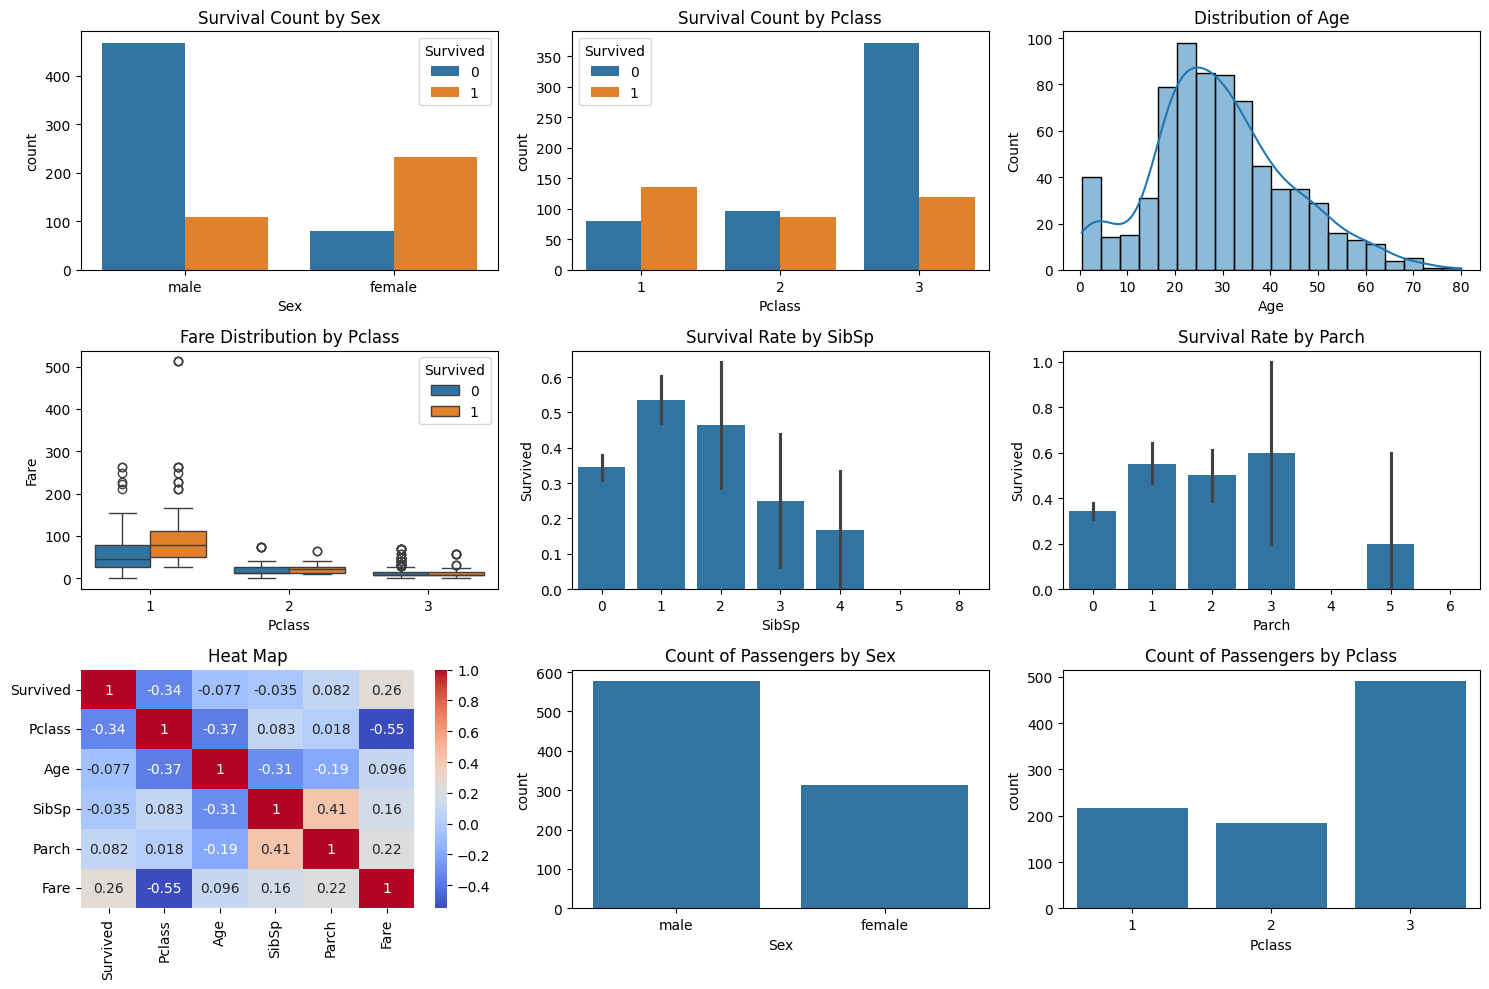

In [60]:
plt.figure(figsize=(15, 10))

# 1. Sex by Survived
plt.subplot(3, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')

# 2. Pclass by Survived
plt.subplot(3, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Pclass')

# 3. Age Distribution
plt.subplot(3, 3, 3)
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# 4. Pclass by Fare
plt.subplot(3, 3, 4)
sns.boxplot(x='Pclass', y='Fare', data=train_df, hue='Survived')
plt.title('Fare Distribution by Pclass')

# 5. SibSp by Survived
plt.subplot(3, 3, 5)
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.title('Survival Rate by SibSp')

# 6. Parch by Survived
plt.subplot(3, 3, 6)
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.title('Survival Rate by Parch')

# 7. Heatmap
plt.subplot(3, 3, 7)
corr_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')

# 8. Sex
plt.subplot(3, 3, 8)
sns.countplot(x='Sex', data=train_df)
plt.title('Count of Passengers by Sex')

# 9. Pclass
plt.subplot(3, 3, 9)
sns.countplot(x='Pclass', data=train_df)
plt.title('Count of Passengers by Pclass')
plt.tight_layout()
plt.show()

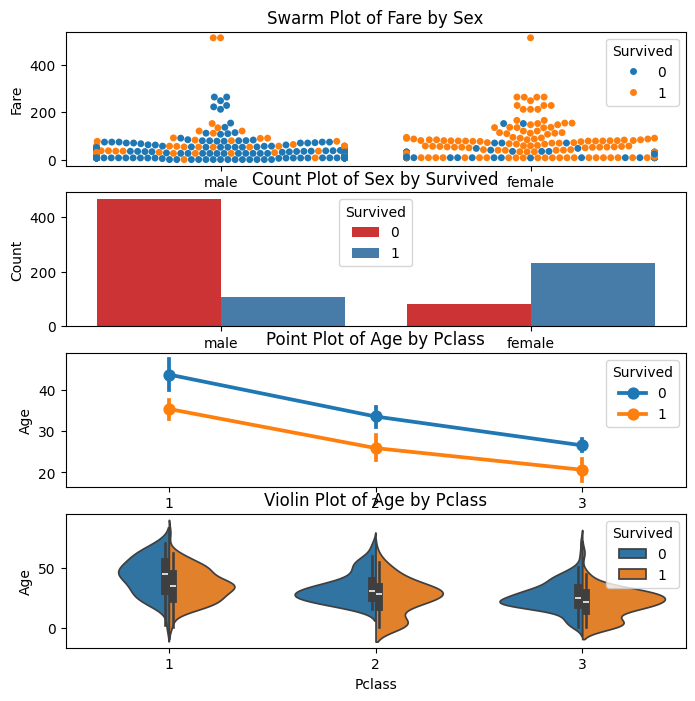

In [61]:
plt.figure(figsize=(8, 8))

# 1. Sex by Fare
plt.subplot(4, 1, 1)
sns.swarmplot(x='Sex', y='Fare', data=train_df, hue='Survived')
plt.title('Swarm Plot of Fare by Sex')

# 2. Sex by Survived

plt.subplot(4, 1, 2)
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='Set1')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Plot of Sex by Survived')

# 3. Pclass by Age
plt.subplot(4, 1, 3)
sns.pointplot(x='Pclass', y='Age', data=train_df, hue='Survived')
plt.title('Point Plot of Age by Pclass')

# 4. Pclass by Age
plt.subplot(4, 1, 4)
sns.violinplot(x='Pclass', y='Age', data=train_df, hue='Survived', split=True)
plt.title('Violin Plot of Age by Pclass')
plt.show()


In [62]:
# Checking missing values on train dataset
print("Train dataset missing values:\n", train_df.isnull().sum())

# Checking missing values on test dataset
print("\nTest dataset missing values:\n", test_df.isnull().sum())

Train dataset missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test dataset missing values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [63]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df], axis = 0).reset_index(drop = False)

In [64]:
train_df[train_df["Embarked"].isnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


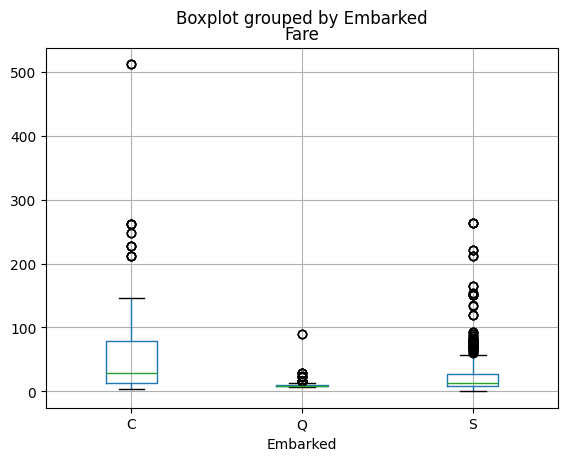

In [65]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [66]:
train_df = train_df.dropna(subset=['Embarked'])
train_df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [67]:
train_df[train_df["Fare"].isnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [68]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [69]:
train_df = train_df.dropna(subset=['Survived'])
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)
print(train_df.isnull().sum())

index          0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [70]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [71]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
16,16,17,0.0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
119,119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,S
164,164,165,0.0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S
268,268,269,1.0,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,S
297,297,298,0.0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
305,305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
386,386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,S
438,438,439,0.0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,S
587,587,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,C


In [72]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [73]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [74]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']
X = X[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Check the resulting columns
print(X_encoded.head())

   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


In [75]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.34, random_state=42)

# Check the shapes of the new splits
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (570, 8)
X_val shape: (294, 8)
y_train shape: (570,)
y_val shape: (294,)


In [76]:
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test_encoded = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.fillna(X_test_encoded.mean())
print(X_test_encoded.isnull().sum())

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [77]:
logreg = LogisticRegression(max_iter=177)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_val)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')

Logistic Regression Accuracy: 0.8061


In [78]:
svm = SVC(max_iter=197)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm:.4f}')

Support Vector Machine Accuracy: 0.7245


In [79]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_val)
accuracy_decision_tree = accuracy_score(y_val, y_pred_decision_tree)
print(f'Decision Tree Accuracy: {accuracy_decision_tree:.4f}')

Decision Tree Accuracy: 0.7551


In [80]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_val)
accuracy_random_forest = accuracy_score(y_val, y_pred_random_forest)
print(f'Random Forest Accuracy: {accuracy_random_forest:.4f}')

Random Forest Accuracy: 0.7823


In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}')

K-Nearest Neighbors Accuracy: 0.6837


In [82]:
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('svm', svm),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('knn', knn)
], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_val)
accuracy_voting = accuracy_score(y_val, y_pred_voting)
print(f'Voting Classifier Accuracy: {accuracy_voting:.4f}')

Voting Classifier Accuracy: 0.8265


In [83]:
test_survived = pd.Series(voting_clf.predict(X_test_encoded), name="Survived").astype(int)

# Combining prediction results with PassengerId from test dataset
results = pd.concat([test_df['PassengerId'], test_survived], axis=1)
results.to_csv("submission.csv", index=False)

In [84]:
# Last Results
survived_counts = test_survived.value_counts()

In [85]:
survived_counts

Survived
0    294
1    124
Name: count, dtype: int64

In [86]:
test_survived

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64